# Classification of MNIST Data using ANN

In [38]:
# Import necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data Loading

In [39]:
# Load the MNIST data

(x_train_data, y_train_data), (x_test_data, y_test_data) = mnist.load_data()

# Preprocessing the Data

In [40]:
# Preprocess the data: Normalize the visual data to the 0-1 scale.

x_normalized_train = x_train_data.astype('float32') / 255
x_normalized_test = x_test_data.astype('float32') / 255

# One-hot encoding: Convert class vectors to binary class matrices
y_train_one_hot_encoding = to_categorical(y_train_data, 10)
y_test_one_hot_encoding = to_categorical(y_test_data, 10)

# Model Implementation

In [41]:
#Model implemented in Keras

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
y_prediction = model(x_normalized_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [43]:
# Train the model

history = {}
with tf.device('/gpu:0'):
    history = model.fit(x_normalized_train, y_train_one_hot_encoding, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9275
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9672
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0782 - accuracy: 0.9760
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0363 - accuracy: 0.9891
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015


# Plotting Training loss with epochs

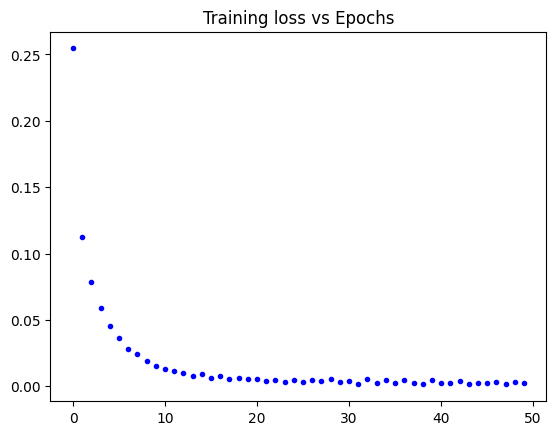

In [44]:
#Plotting loss

plt.plot(history.history['loss'],'b.')
plt.title("Training loss vs Epochs")
plt.show()

# Evaluation on Test Data

In [45]:
#Predicting on normalised test data

y_prediction = model.predict(x_normalized_test)

313/313 [==============================] - 0s 1ms/step


In [47]:
#Converting Probability vector to one hot encoding

idx = np.argmax(y_prediction, axis=-1)
y_prediction = np.zeros( y_prediction.shape )
y_prediction[ np.arange(y_prediction.shape[0]), idx] = 1

In [49]:
#Accuracy Score

print(f"Accuracy of the model is {accuracy_score(y_prediction,y_test_one_hot_encoding)%100}%")

Accuracy of the model is 0.9791%
